<a href="https://colab.research.google.com/github/tomonari-masada/course2023-intro2ml/blob/main/13_MLP_(in_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多層パーセプトロン(MLP; multi-layer perceptron)
* シンプルなニューラルネットワークである。
 * CNNやRNNのようなアーキテクチャに比べてシンプル、ということ。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## toy dataでMLPを試す

In [6]:
from sklearn.neural_network import MLPClassifier

X_xor = [[0., 0.], [1., 1.], [0., 1.], [1., 0.]]
y_xor = [0, 0, 1, 1]
clf = MLPClassifier(random_state=1)
clf.fit(X_xor, y_xor)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

* どういうデータを分類していたかを確認
 * 線形なモデルは学習できない問題。

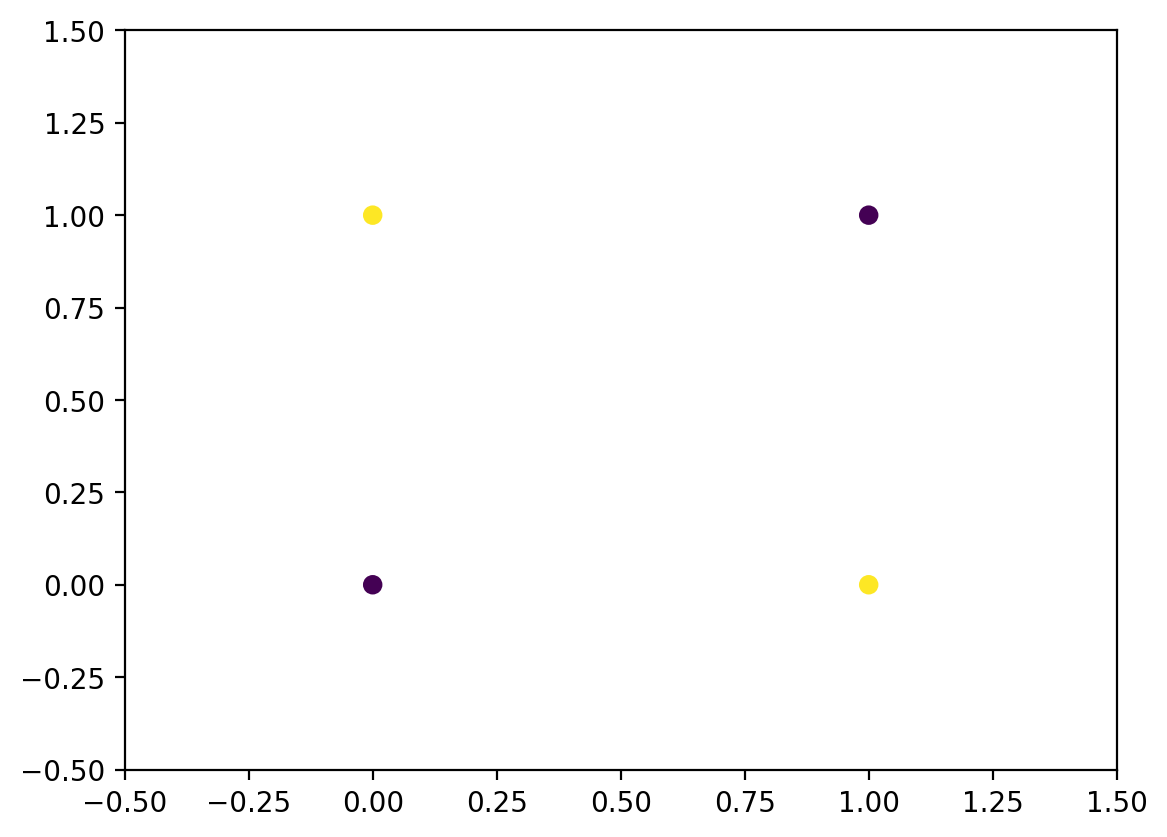

In [5]:
X_xor = np.array([[0., 0.], [1., 1.], [0., 1.], [1., 0.]])
plt.scatter(X_xor[:,0], X_xor[:,1], c=y_xor)
plt.xlim(-.5,1.5)
plt.ylim(-.5,1.5)
plt.show()

### 分類境界を可視化する
* 直線ではなく、曲線で分割できていることに注意。

TypeError: ignored

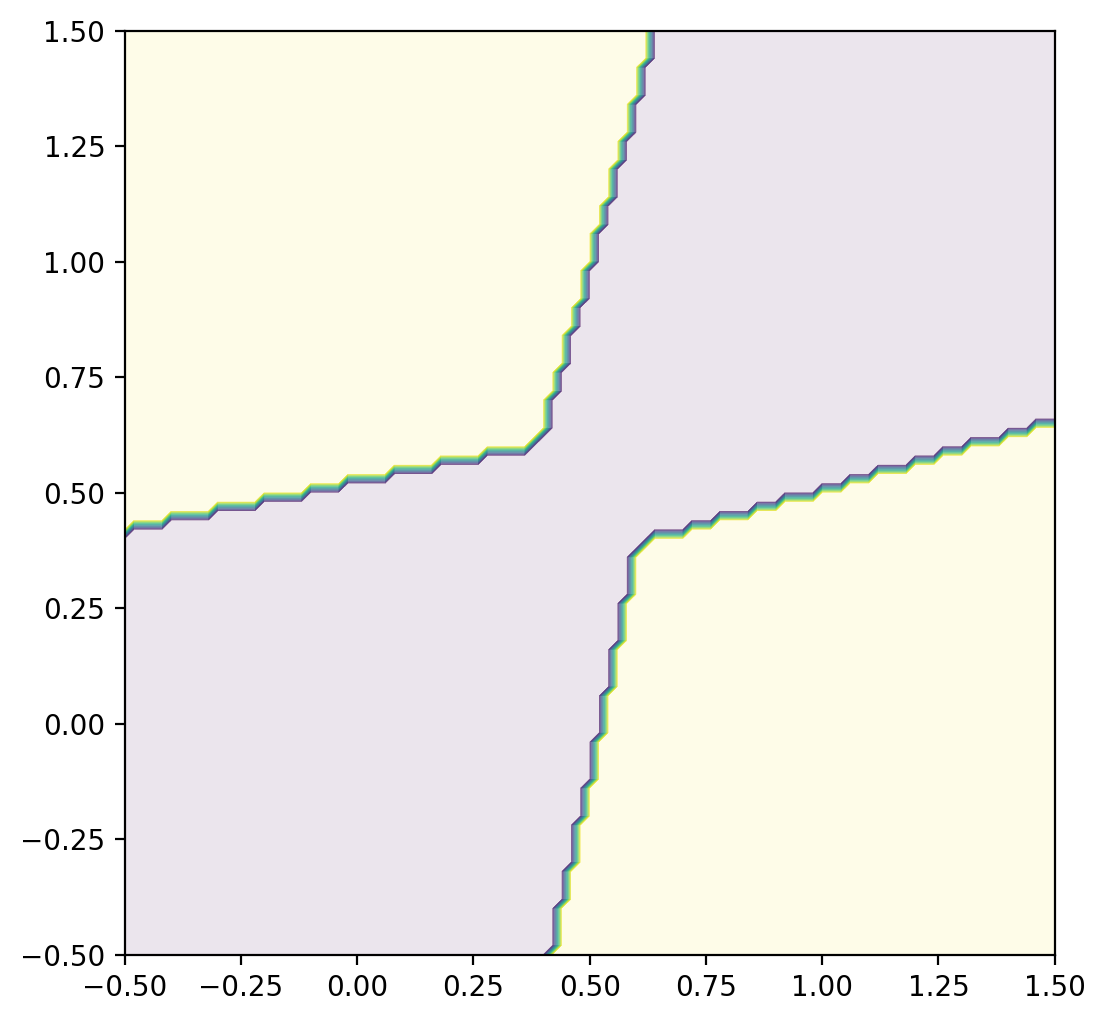

In [8]:
x1 = np.linspace(-0.5, 1.5, 101)
x2 = np.linspace(-0.5, 1.5, 101)
z = clf.predict(np.array([[i, j] for j in x2 for i in x1])).reshape(101,101)
plt.figure(figsize=(6,6))
plt.contourf(x1, x2, z, 100, alpha=0.1)
plt.scatter(X_xor[:,0], X_xor[:,1], c=y_xor)
plt.show()

## MNISTデータを使う

* scikit-learnに用意されている仕組みを利用してMNISTデータをダウンロードする。

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


* 通常、MNISTデータは最後の10000件をテストデータとして使う。

In [10]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

* テストデータ以外の60000件を、訓練データ50000件と検証データ10000件へ分割しておく。

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=10000,
                                                      random_state=42)

* 訓練データの最初の100個を可視化してみる。

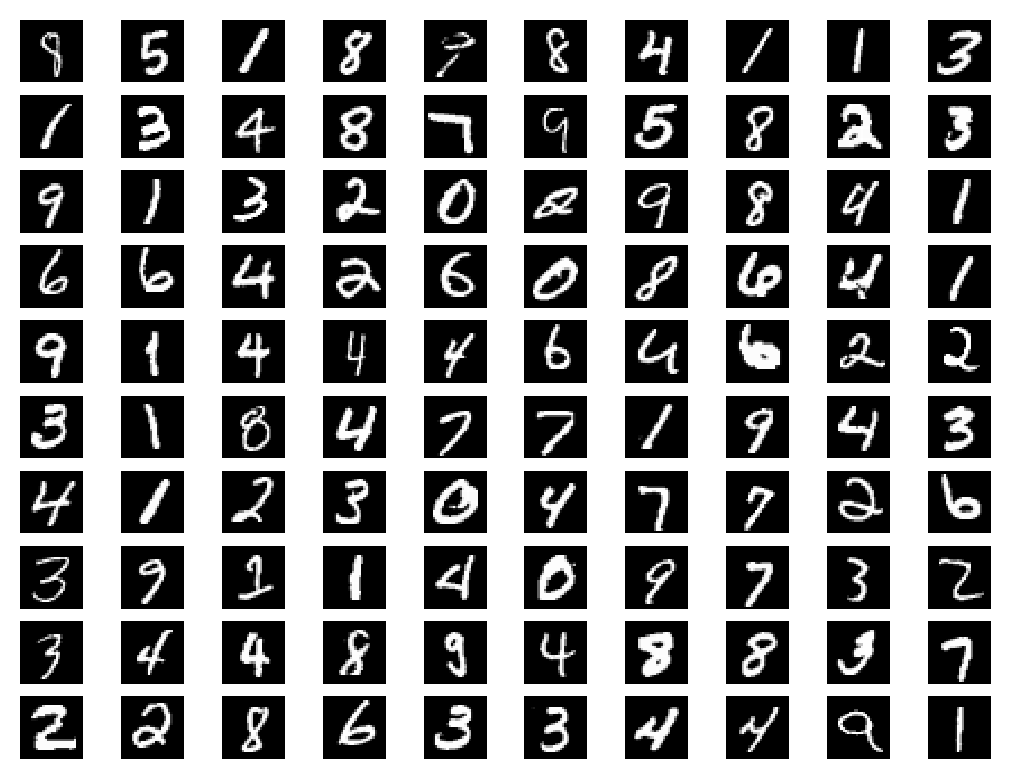

In [12]:
fig, axes = plt.subplots(10, 10)
for x, ax in zip(X_train.values, axes.ravel()):
  ax.axis('off') # 軸を消す
  ax.matshow(x.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

In [13]:
X_train.shape

(50000, 784)

* 今回は、「０」から「９」の10種類へと分類する10値分類の問題を解く。
 * 前回までのように2値分類に変換したりはしない。

* 実は、今までのロジスティック回帰やSVMも、2値分類に変換しなければ、10値分類として実行できていた！
 * 各自確認してみてください。

## 前処理：標準化
* 各ピクセルでの平均が0、標準偏差が1になるように、データを標準化しておく。
* こうすると分類精度が良くなったりする。

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # 訓練データで平均と標準偏差を計算
X_train = scaler.transform(X_train) # 訓練データで求めた平均と標準偏差を使って標準化する
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


## MLPによる分類の実行


* MLPを使う準備
 * いろいろな設定項目を指定する。

* 入力サイズ 784=28*28
* 出力サイズ 10

In [22]:
clf = MLPClassifier(hidden_layer_sizes=[300, 200, 100],
                    random_state=1,
                    verbose=True, # 損失関数の値を表示
                    warm_start=True) # 学習を再開できるようにする

* 待てないときは、強制的に止めることもできる。（学習結果は残っている。）

In [23]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.28127577
Iteration 2, loss = 0.09949232
Iteration 3, loss = 0.06014284
Iteration 4, loss = 0.03933521
Iteration 5, loss = 0.02663917
Iteration 6, loss = 0.02310255
Iteration 7, loss = 0.01340892
Iteration 8, loss = 0.01217943
Iteration 9, loss = 0.01553488


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(300, 100), random_state=1, verbose=True,
              warm_start=True)

In [24]:
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

Accuracy: 0.9711


* どの数字をどのクラスに何個間違ったかを表す混同行列を可視化する。

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, clf.predict(X_valid))

array([[ 964,    0,    4,    0,    1,    3,    4,    2,    5,    1],
       [   0, 1083,    5,    1,    0,    0,    1,    1,    1,    1],
       [   0,    5,  962,    3,    3,    1,    4,    8,    6,    2],
       [   0,    2,   13,  956,    1,   16,    0,    3,    5,    4],
       [   0,    3,    3,    1,  955,    1,    3,    4,    1,    9],
       [   2,    1,    0,    4,    3,  885,   13,    3,    4,    4],
       [   1,    1,    0,    0,    0,    3,  973,    1,    2,    0],
       [   0,    5,    4,    0,    1,    1,    0, 1044,    0,    5],
       [   4,    7,    8,    7,    6,   10,   10,    3,  913,   11],
       [   3,    1,    2,    2,   12,    5,    2,   46,    1,  936]])

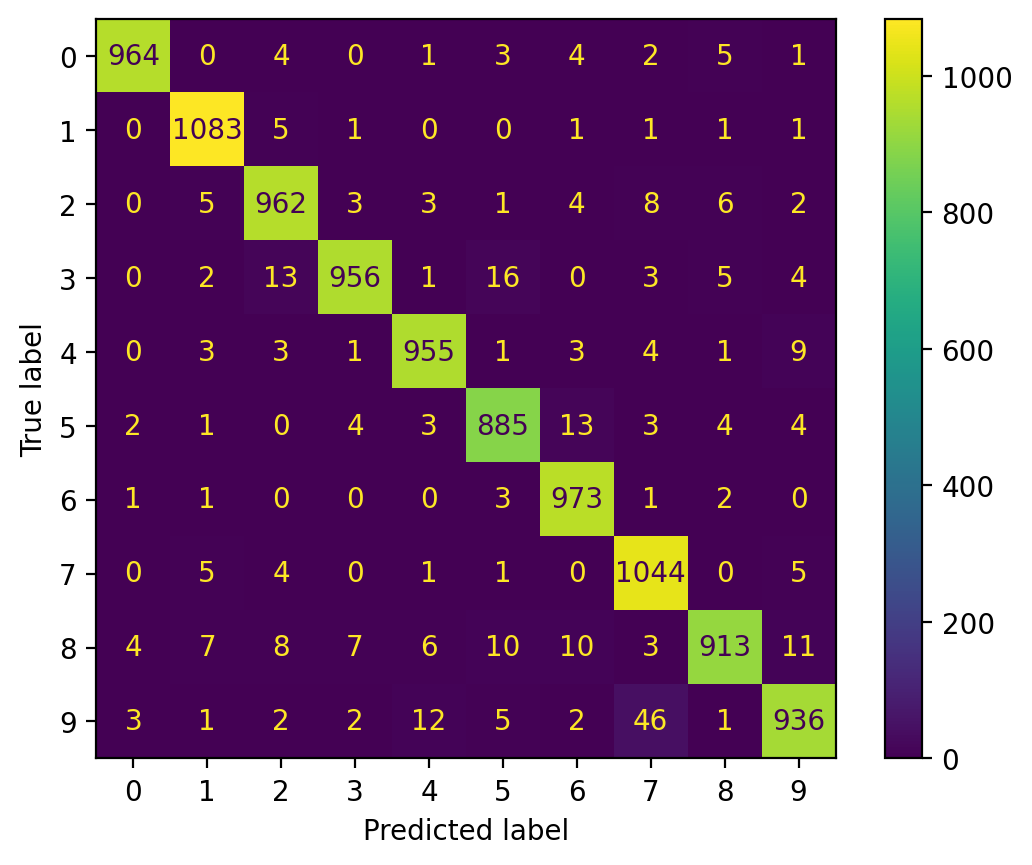

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, clf.predict(X_valid))
cm_display = ConfusionMatrixDisplay(cm).plot()

## 見つけ出した最善の設定を使ってテストデータ上で評価


In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=100, random_state=1,
                    verbose=True,
                    warm_start=True)

In [ ]:
X_train_valid = np.concatenate([X_train, X_valid])

In [ ]:
y_train_valid = np.concatenate([y_train, y_valid])

In [ ]:
clf.fit(X_train_valid, y_train_valid)

In [ ]:
print(f'Test Accuracy: {clf.score(X_test, y_test):.4f}')